In [1]:
import numpy as np
import pandas as pd

In [2]:
tsize=0.30 #test size

In [3]:
df_2= pd.read_csv('data_preprocessed.csv')
df_2

,ttime,pm1,pm2,pm3,sm,lum,temp,humd,pres
0,18-07-2022 15:39,0.83,0.00,0.00,7463,8379.8,23.02,90.57,92849.25
1,18-07-2022 15:44,1.39,0.00,0.00,7576,8379.8,23.47,88.37,92848.31
2,18-07-2022 15:49,1.95,0.00,0.00,7576,8379.8,23.64,85.26,92844.82
3,18-07-2022 15:54,2.51,0.00,0.00,7463,8379.8,23.62,85.93,92834.94
4,18-07-2022 15:59,0.55,2.51,2.51,7463,8379.8,23.82,86.06,92815.25
...,...,...,...,...,...,...,...,...,...
20161,10-03-2023 08:59,0.55,1.11,27.38,327,5366.0,27.04,32.24,93560.72
20162,10-03-2023 09:27,1.11,1.11,27.38,327,7359.0,28.53,28.69,93574.12
20163,10-03-2023 09:55,1.67,1.11,27.38,327,7359.0,30.07,24.39,93571.75
20164,10-03-2023 10:23,0.55,1.67,27.93,327,8386.0,31.55,22.99,93558.36


In [4]:
X= df_2[['pm1', 'pm2', 'pm3','lum', 'temp', 'humd','pres']]
y=df_2['sm']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tsize, random_state = 0)

In [6]:
X_train

,pm1,pm2,pm3,lum,temp,humd,pres
14523,1.11,1.67,38.55,1.000000,20.34,79.15,93212.80
6501,2.23,2.79,64.26,2.200000,20.54,100.00,92959.09
14695,1.67,1.67,38.55,5889.666667,32.52,46.21,93362.86
14779,1.67,1.67,38.55,10439.000000,27.89,52.28,93063.65
13174,0.55,1.67,42.46,1.000000,18.54,99.34,93417.62
...,...,...,...,...,...,...,...
13123,1.67,1.67,43.02,8259.666667,28.25,54.60,93545.69
19648,0.55,1.11,28.49,9723.666667,32.83,18.31,93764.47
9845,1.11,2.23,51.40,5894.500000,21.57,93.30,93294.72
10799,2.23,2.23,48.05,7190.000000,24.21,76.44,92819.74


In [7]:
X_test

,pm1,pm2,pm3,lum,temp,humd,pres
12130,0.55,1.67,45.26,1.000000,19.11,97.46,93493.99
15960,1.67,1.67,35.20,1.000000,19.35,93.13,93521.99
17445,1.67,1.67,33.52,5.000000,15.15,100.00,93607.17
13067,2.23,1.67,42.46,3203.250000,25.30,55.30,93196.14
16124,1.11,1.11,34.64,6742.666667,26.07,53.39,93600.05
...,...,...,...,...,...,...,...
6969,2.23,2.79,64.26,1.000000,21.38,100.00,93082.69
1092,1.11,5.58,128.52,3453.100000,26.56,71.69,93007.26
2004,1.67,4.47,110.08,1.555556,20.76,97.73,93039.12
11876,0.55,2.23,45.26,1.000000,19.02,100.00,93233.05


In [8]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestRegressor()

In [9]:
rfc_pred = rfc.predict(X_test)

In [10]:
from sklearn import metrics

In [11]:
metrics.mean_squared_error(rfc_pred,y_test)

126435.37056497521

In [12]:
def squared_error(y_pred,y_train):
    return sum((y_pred - y_train) * (y_pred- y_train))

In [13]:
from statistics import mean

In [14]:
def coefficient_of_determination(y_pred,y_test):
    y_mean_line = [mean(y_pred) for y in y_test]
    squared_error_regr = squared_error(y_pred, y_test)
    squared_error_y_mean = squared_error(y_pred, y_mean_line)
    return 1 - squared_error_regr/squared_error_y_mean

In [15]:
r_squared = coefficient_of_determination(rfc_pred,y_test)
print(r_squared)

0.9864187068735902


In [16]:
metrics.mean_absolute_error(rfc_pred,y_test)

129.57978347107436

In [17]:
import matplotlib.pyplot as plt

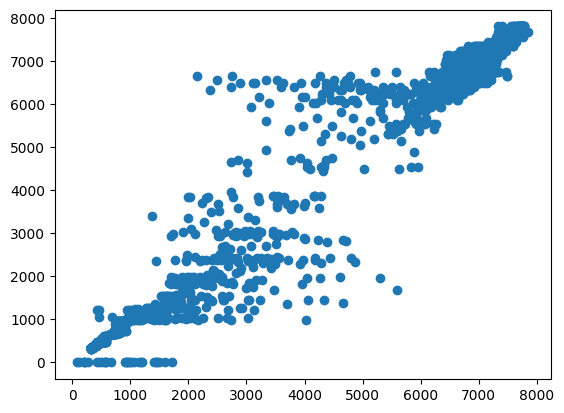

In [18]:
plt.scatter(rfc_pred,y_test)